In [1]:
import pickle
import scipy as sp
import numpy as np
import pandas as pd
import anndata
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from bioinfokit import analys, visuz
import scanpy as sc
import bbknn
from matplotlib.pyplot import rc_context

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.display import display_html
def display2(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
Sman_peak_anno = pd.read_csv("./MetaData/Sman.chipseekr_annots.csv")
Sman_peak_anno['peak_type'] = "Promoter"
Sman_peak_anno['peak_type'][Sman_peak_anno.annotation.str.contains("Promoter") ] = "Promoter"
Sman_peak_anno['peak_type'][Sman_peak_anno.annotation.str.contains("Distal Intergenic") ] = "Distal Intergenic"
Sman_peak_anno['peak_type'][Sman_peak_anno.annotation.str.contains("Intron") ] = "Intronic"
Sman_peak_anno['peak_type'][Sman_peak_anno.annotation.str.contains("Exon") ] = "Exonic"
Sman_peak_anno['peak'] = Sman_peak_anno['seqnames'] + ':' + Sman_peak_anno['start'].astype(str) + '-' + Sman_peak_anno['end'].astype(str)

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python

In [3]:
Smed_peak_anno = pd.read_csv("./MetaData/Smed.chipseekr_annots.csv")
Smed_peak_anno['peak_type'] = "Promoter"
Smed_peak_anno['peak_type'][Smed_peak_anno.annotation.str.contains("Promoter") ] = "Promoter"
Smed_peak_anno['peak_type'][Smed_peak_anno.annotation.str.contains("Distal Intergenic") ] = "Distal Intergenic"
Smed_peak_anno['peak_type'][Smed_peak_anno.annotation.str.contains("Intron") ] = "Intronic"
Smed_peak_anno['peak_type'][Smed_peak_anno.annotation.str.contains("Exon") ] = "Exonic"
Smed_peak_anno['peak'] = Smed_peak_anno['seqnames'] + ':' + Smed_peak_anno['start'].astype(str) + '-' + Smed_peak_anno['end'].astype(str)

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python

In [4]:
Mlig_peak_anno = pd.read_csv("./MetaData/Mlig.chipseekr_annots.csv")
Mlig_peak_anno['peak_type'] = "Promoter"
Mlig_peak_anno['peak_type'][Mlig_peak_anno.annotation.str.contains("Promoter") ] = "Promoter"
Mlig_peak_anno['peak_type'][Mlig_peak_anno.annotation.str.contains("Distal Intergenic") ] = "Distal Intergenic"
Mlig_peak_anno['peak_type'][Mlig_peak_anno.annotation.str.contains("Intron") ] = "Intronic"
Mlig_peak_anno['peak_type'][Mlig_peak_anno.annotation.str.contains("Exon") ] = "Exonic"
Mlig_peak_anno['peak'] = Mlig_peak_anno['seqnames'] + ':' + Mlig_peak_anno['start'].astype(str) + '-' + Mlig_peak_anno['end'].astype(str)

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/gary/anaconda2/envs/jgpy37/lib/python

In [13]:
Sman = Sman_peak_anno['peak_type'].value_counts(normalize=True)
Smed = Smed_peak_anno['peak_type'].value_counts(normalize=True)
Mlig = Mlig_peak_anno['peak_type'].value_counts(normalize=True)

In [14]:
Sman

Intronic             0.439399
Distal Intergenic    0.311606
Exonic               0.166530
Promoter             0.082464
Name: peak_type, dtype: float64

In [15]:
Smed

Distal Intergenic    0.534449
Intronic             0.257030
Promoter             0.115100
Exonic               0.093421
Name: peak_type, dtype: float64

In [16]:
Mlig

Promoter             0.299282
Exonic               0.261645
Distal Intergenic    0.233927
Intronic             0.205145
Name: peak_type, dtype: float64

In [17]:
data = {'species': ['Mlig','Smed','Sman'], 'Promoter': [ 0.299282,0.115100,0.082464], 'Intergenic': [0.233927,0.534449,0.311606], 'Intronic' : [0.205145,0.257030,0.439399], 
        'Exonic' :[0.261645,0.093421,0.166530]}
df = pd.DataFrame(data=data)
df

,species,Promoter,Intergenic,Intronic,Exonic
0,Mlig,0.299282,0.233927,0.205145,0.261645
1,Smed,0.115100,0.534449,0.257030,0.093421
2,Sman,0.082464,0.311606,0.439399,0.166530


In [22]:
### For marker 
### Just needed to apply one threshold to get marker preaks
Mlig_marker = pd.read_csv("./scVI_models/Mlig.peakvi_marker_peaks.csv.gz",index_col=0)
Smed_marker = pd.read_csv("./scVI_models/Smed.peakvi_marker_peaks.csv.gz",index_col=0)
Sman_marker = pd.read_csv("./scVI_models/Sman.peakvi_marker_peaks.csv.gz",index_col=0)

Mlig_marker = Mlig_marker[(Mlig_marker.prob_da > 0.85) & (Mlig_marker.effect_size < -0.1)]
Mlig_marker = Mlig_marker.groupby(Mlig_marker.index).last()

Smed_marker = Smed_marker[(Smed_marker.prob_da > 0.85) & (Smed_marker.effect_size < -0.1)]
Smed_marker = Smed_marker.groupby(Smed_marker.index).last()

Sman_marker = Sman_marker[(Sman_marker.prob_da > 0.85) & (Sman_marker.effect_size < -0.1)]
Sman_marker = Sman_marker.groupby(Sman_marker.index).last()

### marker annotation 
Sman_marker_anno = Sman_peak_anno[Sman_peak_anno.peak.isin(Sman_marker.index)]
Smed_marker_anno = Smed_peak_anno[Smed_peak_anno.peak.isin(Smed_marker.index)]
Mlig_marker_anno = Mlig_peak_anno[Mlig_peak_anno.peak.isin(Mlig_marker.index)]

Mlig = Mlig_marker_anno['peak_type'].value_counts(normalize=True) 
schisto = Sman_marker_anno['peak_type'].value_counts(normalize=True)
Smed = Smed_marker_anno['peak_type'].value_counts(normalize=True)

In [23]:
schisto

Intronic             0.363371
Distal Intergenic    0.320123
Exonic               0.178458
Promoter             0.138047
Name: peak_type, dtype: float64

In [24]:
Smed

Distal Intergenic    0.421564
Intronic             0.290386
Promoter             0.163807
Exonic               0.124243
Name: peak_type, dtype: float64

In [25]:
Mlig

Promoter             0.396132
Distal Intergenic    0.225313
Intronic             0.194330
Exonic               0.184225
Name: peak_type, dtype: float64

In [29]:
data = {'species': ['Mlig','Smed','Sman'], 'Promoter': [0.396132,0.163807,0.138047], 'Intergenic': [0.225313,0.421564,0.320123], 'Intronic' : [0.194330,0.290386,0.363371], 
        'Exonic' :[0.184225,0.124243,0.178458]}
df_marker = pd.DataFrame(data=data)
df_marker

,species,Promoter,Intergenic,Intronic,Exonic
0,Mlig,0.396132,0.225313,0.194330,0.184225
1,Smed,0.163807,0.421564,0.290386,0.124243
2,Sman,0.138047,0.320123,0.363371,0.178458


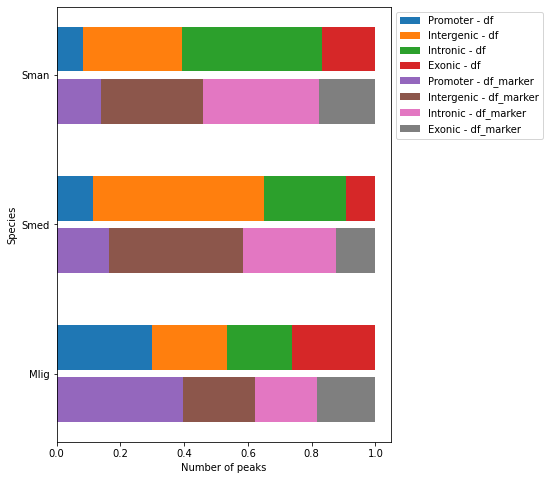

In [31]:
# Plotting
fig, ax = plt.subplots(figsize=(6,8))
names = ('M. lignano','S. mediterranea','S. mansoni')

bar_width = 0.3  # Width of each bar
buffer = 0.05
bar_positions_df = np.arange(len(df['species']))
bar_positions_df_marker = bar_positions_df + bar_width+ buffer 

# Plot bars for df
for i, category in enumerate(['Promoter', 'Intergenic', 'Intronic', 'Exonic']):
    ax.barh(bar_positions_df_marker, df[category], height=bar_width, label=f'{category} - df', left=df.iloc[:, 1:i+1].sum(axis=1))

# Plot bars for df_marker
for i, category in enumerate(['Promoter', 'Intergenic', 'Intronic', 'Exonic']):
    ax.barh(bar_positions_df, df_marker[category], height=bar_width, label=f'{category} - df_marker', left=df_marker.iloc[:, 1:i+1].sum(axis=1))

# Set Y-axis labels
ax.set_yticks((bar_positions_df + bar_positions_df_marker) / 2)
ax.set_yticklabels(df['species'])

# Set legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


# Set labels and title
ax.set_xlabel('Number of peaks')
ax.set_ylabel('Species')

plt.savefig("./Plots/Fig1/Fig1c.svg", format='svg')

# Show the plot
plt.show()